In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization

from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.initializers import GlorotUniform, Zeros
from tensorflow.keras.optimizers import Adam

# Training and Improving Neural Networks
## Live Demos

In [3]:
fashion_data = pd.read_csv("https://media.githubusercontent.com/media/fpleoni/fashion_mnist/master/fashion-mnist_train.csv")
#"data/fashion-mnist_train.csv")

In [4]:
testing_sample = fashion_data.sample(10)

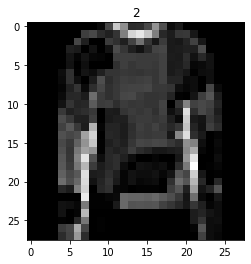

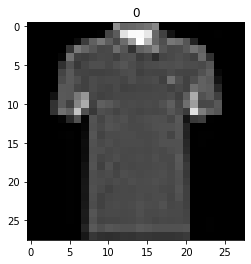

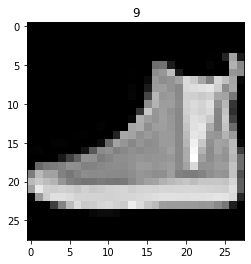

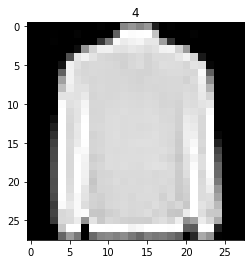

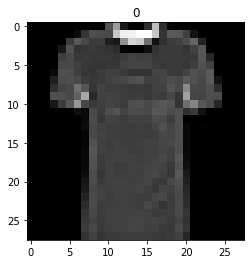

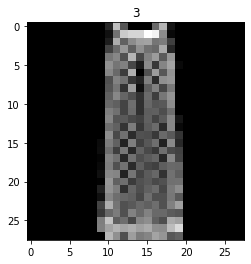

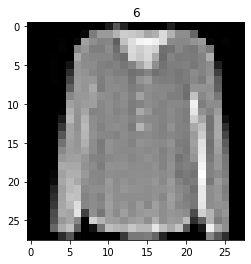

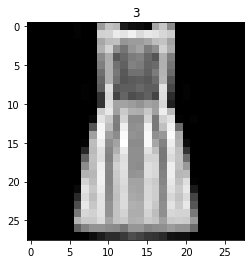

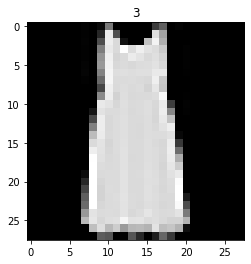

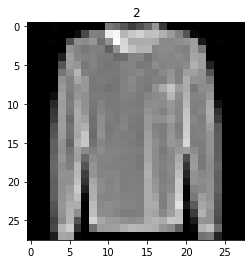

In [5]:
for index, row in testing_sample.iterrows():
    row_values = row.values
    label = row_values[0]
    row_values = row_values[1:].reshape((28, 28))
    
    plt.imshow(row_values, cmap = "gray")
    plt.title(label)
    plt.show()

In [6]:
fashion_attributes = fashion_data.drop("label", axis = 1).values
fashion_labels = fashion_data.label.values

In [7]:
type(fashion_attributes), type(fashion_labels)

(numpy.ndarray, numpy.ndarray)

In [8]:
fashion_attributes = fashion_attributes.astype(np.float64) / 255.0

In [9]:
NUM_COLUMNS = fashion_attributes.shape[1]
NUM_LABELS = len(set(fashion_labels))

DROPOUT_RATE = 0.05

In [10]:
reg = L1L2(l1 = 0.01, l2 = 0.0001)

In [11]:
nn_model = Sequential([
    Input(NUM_COLUMNS),
    Dense(20, activation = "relu"),
    Dropout(DROPOUT_RATE),
    
    BatchNormalization(),
    Dense(10, activation = "relu"),
    Dropout(DROPOUT_RATE),
    
    Dense(30, activation = "relu"),
    Dropout(DROPOUT_RATE),
    Dense(NUM_LABELS, activation = "softmax", kernel_regularizer = reg, bias_regularizer = reg)
])

In [12]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 20)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0

In [13]:
nn_model.compile(optimizer = Adam(learning_rate = 0.0001), loss = "sparse_categorical_crossentropy")

In [14]:
history = nn_model.fit(fashion_attributes, fashion_labels, epochs = 20, steps_per_epoch = 1000)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 72us/sample - loss: 2.1394
Epoch 2/20
60000/60000 [==============================] - 3s 46us/sample - loss: 1.4452
Epoch 3/20
60000/60000 [==============================] - 2s 41us/sample - loss: 1.1719
Epoch 4/20
60000/60000 [==============================] - 3s 51us/sample - loss: 1.0292
Epoch 5/20
60000/60000 [==============================] - 3s 47us/sample - loss: 0.9415
Epoch 6/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.8810
Epoch 7/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.8397
Epoch 8/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.8020
Epoch 9/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.7752
Epoch 10/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.7507
Epoch 11/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.7286
Epoch 1

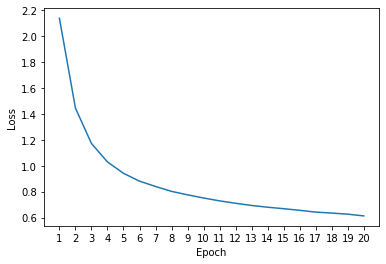

In [15]:
plt.plot(history.history["loss"])
plt.xticks(range(len(history.history["loss"])), range(1, len(history.history["loss"]) + 1))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [16]:
learning_rate_candidates = np.power(10.0, np.arange(-5, 0))

In [17]:
learning_rate_candidates

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01])

In [18]:
learning_rates = np.random.choice(learning_rate_candidates, size = 3, replace = False)

In [19]:
# for lr in learning_rates:
#     nn_model.compile(optimizer = Adam(learning_rate))
#     nn_model.fit(...)